## Analyzing KITTI Dataset

In [1]:
print("hello there")

hello there


In [4]:
# Importing libraries
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [5]:
# find the data
path_img = "D:/ARSALAN/datasets/data_odometry_gray/dataset/sequences/"
path_pose = "D:/ARSALAN/datasets/data_odometry_poses/dataset/poses/"

In [6]:
# loading pose data
num = "00"
poses = pd.read_csv(path_pose + ("%s.txt" % num), delimiter=' ', header=None)

In [7]:
# extracting the ground truth cordinates from pose data
gt = np.array([np.array(poses.iloc[i]).reshape((3, 4)) for i in range(len(poses))])

In [8]:
# Extracting spatial cordinates from gt tensor
z = gt[:, :, 3][:, 2]
y = gt[:, :, 3][:, 1]
x = gt[:, :, 3][:, 0]

In [9]:
# creating 3d plot using plotly
fig = go.Figure(data = [go.Scatter3d(
    x = x,
    y = y,
    z = z,
    mode = 'lines',
    line = dict(color = 'red', width = 2)
)])

In [10]:
# Customize the layout of the plot
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z',
    camera=dict(
        eye=dict(x=1.5, y=1.5, z=0.6),
        projection=dict(type='perspective')
    ),
    bgcolor='whitesmoke',
    xaxis=dict(showgrid=True, gridwidth=0.8, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridwidth=0.8, gridcolor='lightgray'),
    zaxis=dict(showgrid=True, gridwidth=0.8, gridcolor='lightgray')
))

# Add a title to the plot for better context
fig.update_layout(title='Spatial Trajectory', title_font=dict(size=20, color='black'))

# Display the spatial trajectory plot
fig.show()

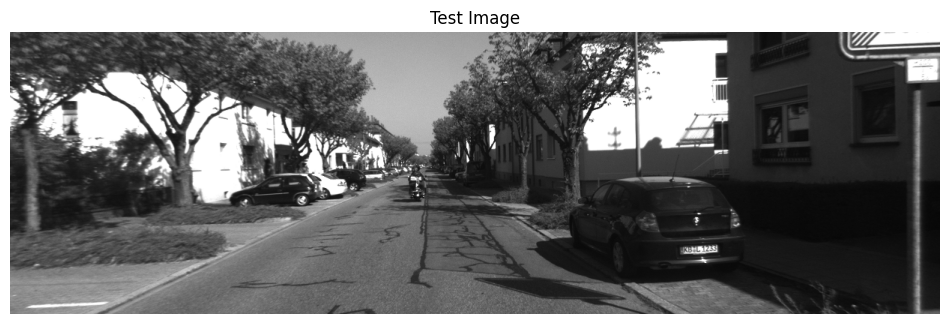

In [11]:
# Load and display a test image
test_img = cv2.imread(path_img + num + '/image_0/000000.png')
plt.figure(figsize=(12, 6))
plt.imshow(test_img)
plt.axis('off')
plt.title('Test Image')
plt.show()